##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



# Purpose

##### The purpose of this project is to visualize and observe data using python so that we can make conclusive decisions about trends we notice in our observations. Research questions are to be thought of on one's own and answered using data from the dataframe provided

# Goal

##### The goal of the project is to showcase the many ways you can go about answering a research question utilizing the many packages that python has to offer, such as pandas, geopandas, seaborn and matplotlib. Using general knowledge on how to navigate these packages and research, we can answer the research questions we made and make conclusive statements about trends in the United States that relate to new registered voters data.

# Importance

##### It's important to throughouly digest the contents of this notebook due to its significance on what it could mean for new voter trends in the future. For example, the conclusive statement we make about California can be used to make predictions about what would happen in the future based on current wildfires. In addition, the notebook showcases many ways to properly filter and visualize data.


# Research Questions:

##### My Nationwide research question involves analyzing the relationship between education level in states and data on new voter registration. Does average education level among citizens contribute to amount of new voters registered?

##### My Statewide research question involves the affect of natural disasters in California, more specifically wildfires, on new voter registration and why that relationship may exist. Did rampid wildifres between 2016 and 2020 in California cause a change in amount of new voters in 2020?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


# Jusrisdiction
##### A string value that shows what state in the United States we are recording data for.
# Year
##### An integer value that shows what year the data was recorded in.
# Month
##### A string value that shows what month the data was recorded in.
# New registered voters
##### An integer that shows the number of new voters within a certain jurisdiction, year and month.

Check for any missing data data. (1 point)

In [ ]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data (2 points)

#### Obviously, the data frame only compares new voter registration in the first four months of both 2016 and 2020, without recording new registered voters between Apr2016 all the way to Jan2020. This is an issue because though people are registering year round; we don't know what the data looks like during actual election time which is late in the year.

#### Also very apparent is the lack of all 50 states on this data frame, the data frame only has a select few states and some states with huge populations. No bigger example of this is New York, which is missing form the data frame.

#### Lastly, some states, such as the District of Columbia, Texas and North Carolina had the months of May2016 and May2020 recorded while most other states did not. This makes it slightly more annoying to calculate averages between states since the sample amount of months is different between states.



###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
voters["registered_voters"].max()
voters.loc[voters.registered_voters>=238281]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
voters["registered_voters"].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters.loc[voters.registered_voters > voters["registered_voters"].mean()]
print(high_voters)

              NAME  Year Month  registered_voters
1          Arizona  2016   Feb              51155
2          Arizona  2016   Mar              48614
5          Arizona  2020   Feb              50853
8       California  2016   Jan              87574
9       California  2016   Feb             103377
10      California  2016   Mar             174278
11      California  2016   Apr             185478
12      California  2020   Jan             151595
13      California  2020   Feb             238281
14      California  2020   Mar             176810
42         Florida  2016   Jan              50231
43         Florida  2016   Feb              87351
44         Florida  2016   Mar              73627
45         Florida  2016   Apr              52508
46         Florida  2020   Jan              77466
47         Florida  2020   Feb             109859
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
59        Illinois  2016   Feb              99674


In [ ]:
print(len(high_voters))

36


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
high_voters["abv_avg"] = high_voters["registered_voters"] > voters["registered_voters"].mean()
high_voters.groupby("NAME")["abv_avg"].value_counts()

<ipython-input-12-05f281cf1831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_voters["abv_avg"] = high_voters["registered_voters"] > voters["registered_voters"].mean()


,,count
NAME,abv_avg,
Arizona,True,3
California,True,7
Florida,True,7
Georgia,True,1
Illinois,True,4
North Carolina,True,6
Texas,True,8


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<function matplotlib.pyplot.show(close=None, block=None)>

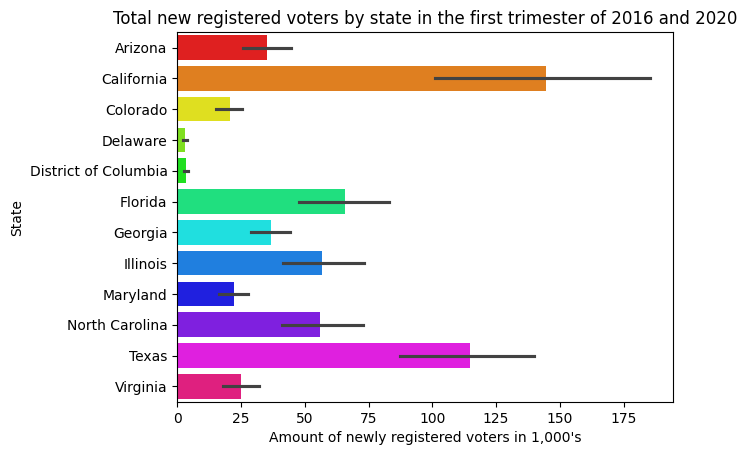

<Figure size 1000x1000 with 0 Axes>

In [ ]:
voters["registered_voters_scaled"] = voters["registered_voters"] / 1e3
colors = ["#FF0000", "#FF7F00", "#FFFF00", "#7FFF00", "#00FF00", "#00FF7F", "#00FFFF", "#007FFF", "#0000FF", "#7F00FF", "#FF00FF", "#FF007F"]
sns.barplot(voters, x="registered_voters_scaled", y="NAME", hue="NAME", palette = colors)
plt.ylabel("State")
plt.xlabel("Amount of newly registered voters in 1,000's")
plt.title("Total new registered voters by state in the first trimester of 2016 and 2020")
plt.figure(figsize=(10, 10))
plt.show

In [ ]:
#States with higher population typically have more newly registered voters and vice versa
#There seems to be little to no correlation between amount of newly registered voters and outcome of vote (whether a state voted blue or red in 2016-2020)
#The two states with the highest amount of newly registered voters have opposite results in both elections
#According to this map published in 2018, (https://www.thrillist.com/news/nation/most-educated-states-in-us-mapped) there seems to be no trend between education level and amount of newly registered voters.
#This is best seen from Delaware and California which are both in the top 15 but have a huge difference in amount of newly registered voters

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

<function matplotlib.pyplot.show(close=None, block=None)>

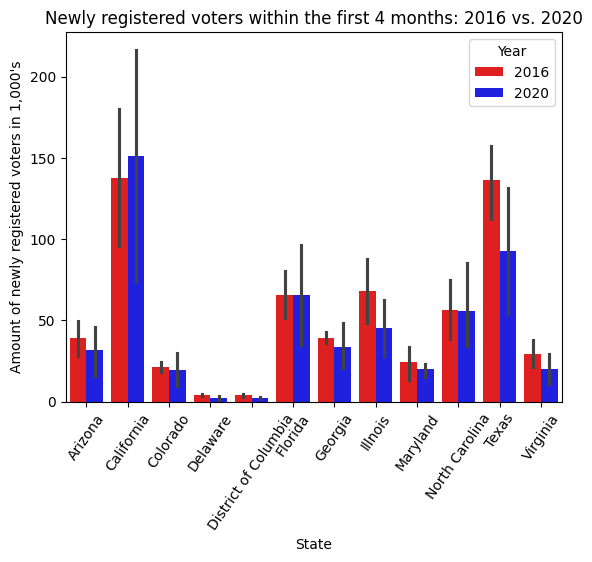

In [ ]:
sns.barplot(voters, x="NAME", y="registered_voters_scaled", hue="Year", palette = ["red", "blue"])
plt.xlabel("State")
plt.ylabel("Amount of newly registered voters in 1,000's")
plt.title("Newly registered voters within the first 4 months: 2016 vs. 2020")
plt.xticks(ticks = range(0,12), labels = ["Arizona", "California", "Colorado", "Delaware", "District of Columbia", "Florida", "Georgia", "Illnois", "Maryland", "North Carolina", "Texas", "Virginia"], rotation=55)
plt.show

In [ ]:
#For the most part, little differences can be seen between data in 2016 and data in 2020
#Only Texas saw a dramatic decrease in newly registered voters in 2020 compared to 2016, every other state recorded had either a slight decrease or a slight increase
#Barely any states increased the amount of newly registered voters, that being California and Florida

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

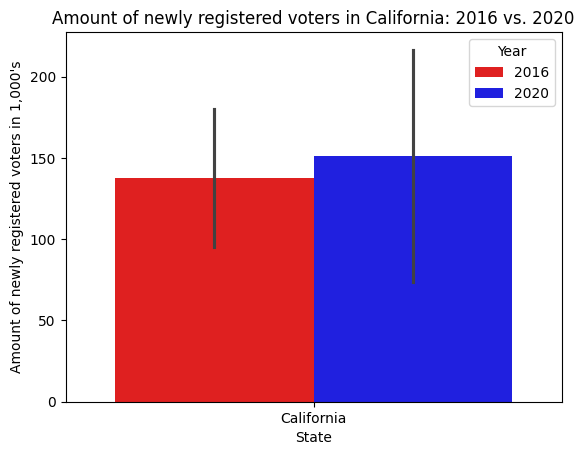

In [ ]:
cali_voters = voters.loc[voters.NAME == "California"]
sns.barplot(cali_voters, x="NAME", y="registered_voters_scaled", hue="Year", palette = ["red", "blue"])
plt.xlabel("State")
plt.ylabel("Amount of newly registered voters in 1,000's")
plt.title("Amount of newly registered voters in California: 2016 vs. 2020")
plt.show()

## Did wildfires in California that occured between the 2016 election and the 2020 election have an impact on amount of newly registered voters in California early 2020?

#### Additional research is required to answer this, California typically has a season every year known as "wildfire season" and most people that live in California are at risk of wildfire damage to their health and property. The California government puts out statistics at the end of every calendar year for wildfires and they recorded that 2017 and 2018 were particularly devastating, seeing over 1.5 million acres burned and over 45 people confirmed dead each, with 2018 having 100 people confirmed dead. It is good to note that the statistics aren't getting better as 2020 was one of California's worst years for wildfires ever, seeing almost 5 million acres damaged. Despite burning homes, dying people and wildfire pollution clogging up everybody's lungs, California saw an increase in amount of newly registered voters between Jan-Apr 2020 compared to Jan-Apr 2016. One might assume that worsening California wildfires might contribute to more and more Californians being displaced and less people from other states wanting to move to California, but during this time frame, California was gaining people in the population. However, less and less people were moving there to the point that California saw its population decrease steadily from January 1st, 2020 to sometime early in the year 2023; that's three straight years of population decline. Seeing that 2020 and 2021 were some of California's worst years statistically for wildfires, one can infer that the dropping population during 2020-2023 is correlated with the wildfires.

#### To make a conclusive statement about the time frame we actually care about, that being 2016-2020, we would need to identify a trend. It would be particularly useful if we had data about newly registered voters during Jan-Apr 2024; If the amount of new voters had dropped then that could be attributed to California having less people than it did in 2020, which it has been established that wildfires are a factor that contribute to such a population stat, among many others. With all of that being said and with the data we have, no 100% positive conclusion can be reached on the particular time frame we are looking at. However, it is likely that California wildfires and amount of newly registered voters in California have an indirect relationship, where the wildfires affect population numbers and that affects amount of newly registered voters. This is seen most apparently when observing population change in California after 2020 and wildfire statistics in those years. Most likely, the increase in newly registered voters in 2020 is more simply just a result from a rising California population in 2016-2020, which can be caused from a plethora of different reasons, including wildfires not being nearly as bad as their maximum potential. Again nothing can be concretely decided with the data at our disposal, but a slight, indirect, trend is definitely present once further research is investigated.

# References

##### 2016 Incident Archive https://www.fire.ca.gov/incidents/2016
##### 2017 Incident Archive https://www.fire.ca.gov/incidents/2017
##### 2018 Incident Archive https://www.fire.ca.gov/incidents/2018
##### 2019 Incident Archive https://www.fire.ca.gov/incidents/2019
##### 2020 Incident Archive https://www.fire.ca.gov/incidents/2020
##### 2021 Incident Archive https://www.fire.ca.gov/incidents/2021
##### California's Population https://www.ppic.org/publication/californias-population/

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = "/content/325-Datasets/cb_2018_us_state_500k.shp"
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

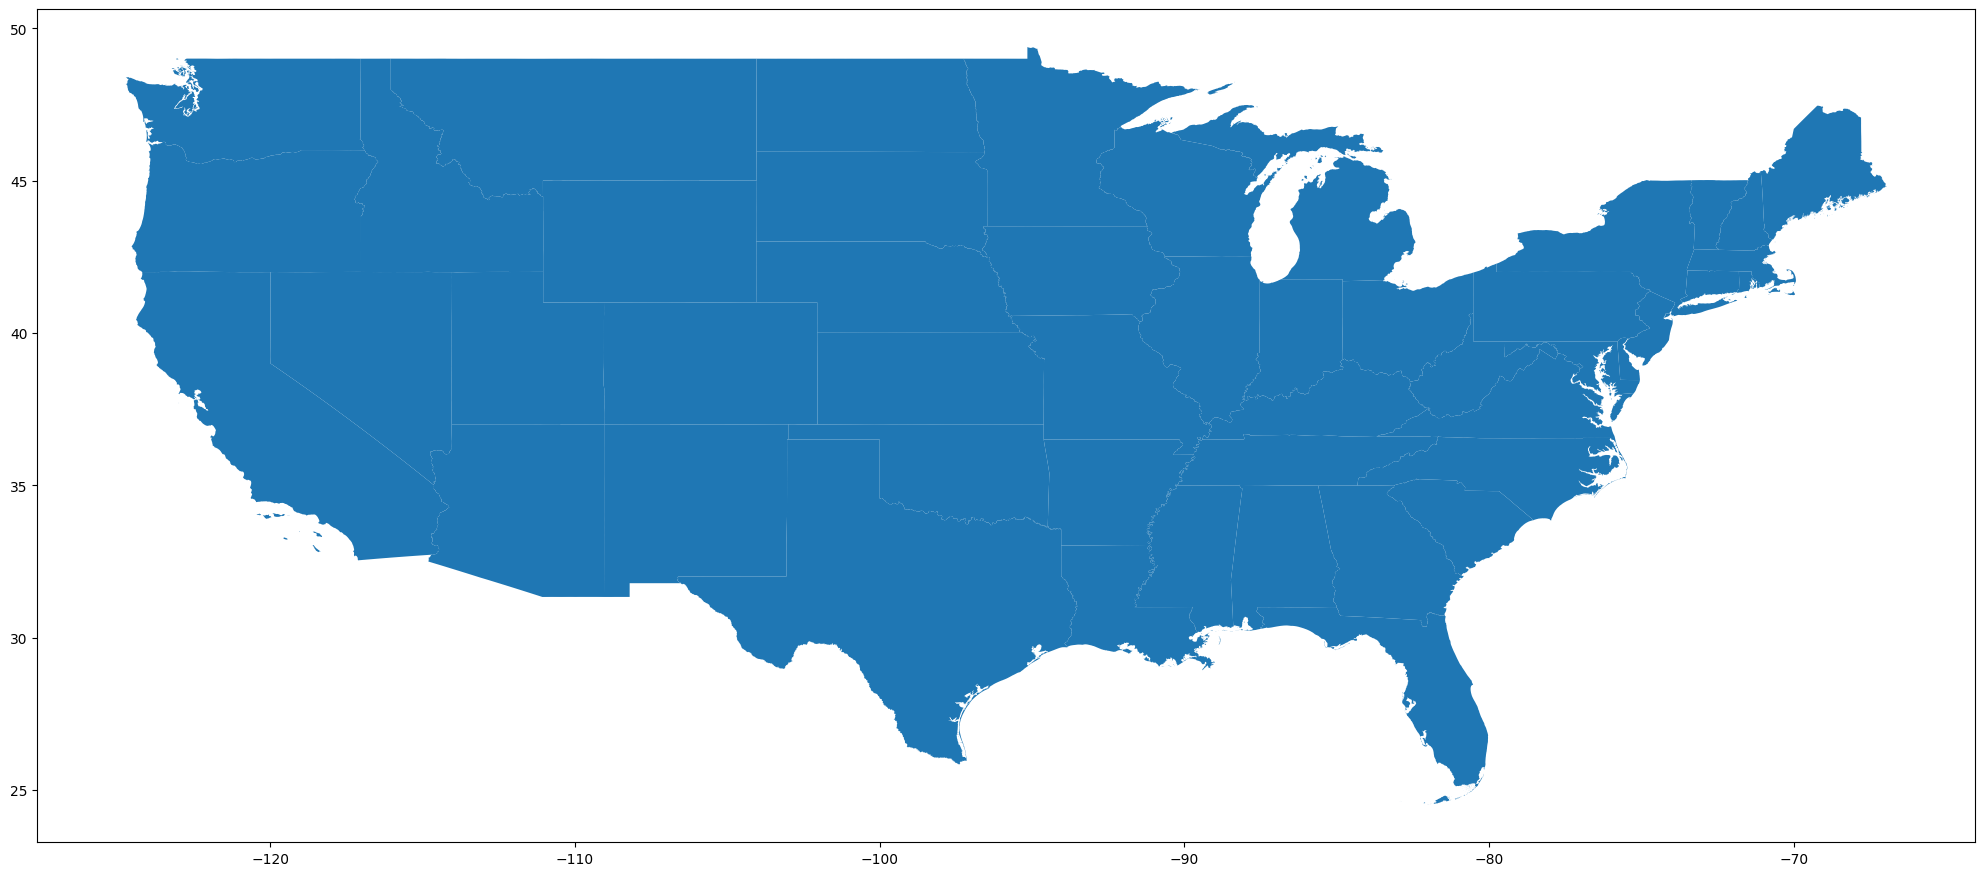

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(25, 15))
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
avg_voters = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voters.rename(columns={"registered_voters": "avg_registered_voters"})

,NAME,avg_registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
states.head() #can use NAME
merged_df = pd.merge(states, avg_voters, on="NAME", how="inner")
merged_df.rename(columns={"registered_voters": "avg_registered_voters"})

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,avg_registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

Text(0.5, 1.0, 'Average Number of Newly Registered Voters in Specific States')

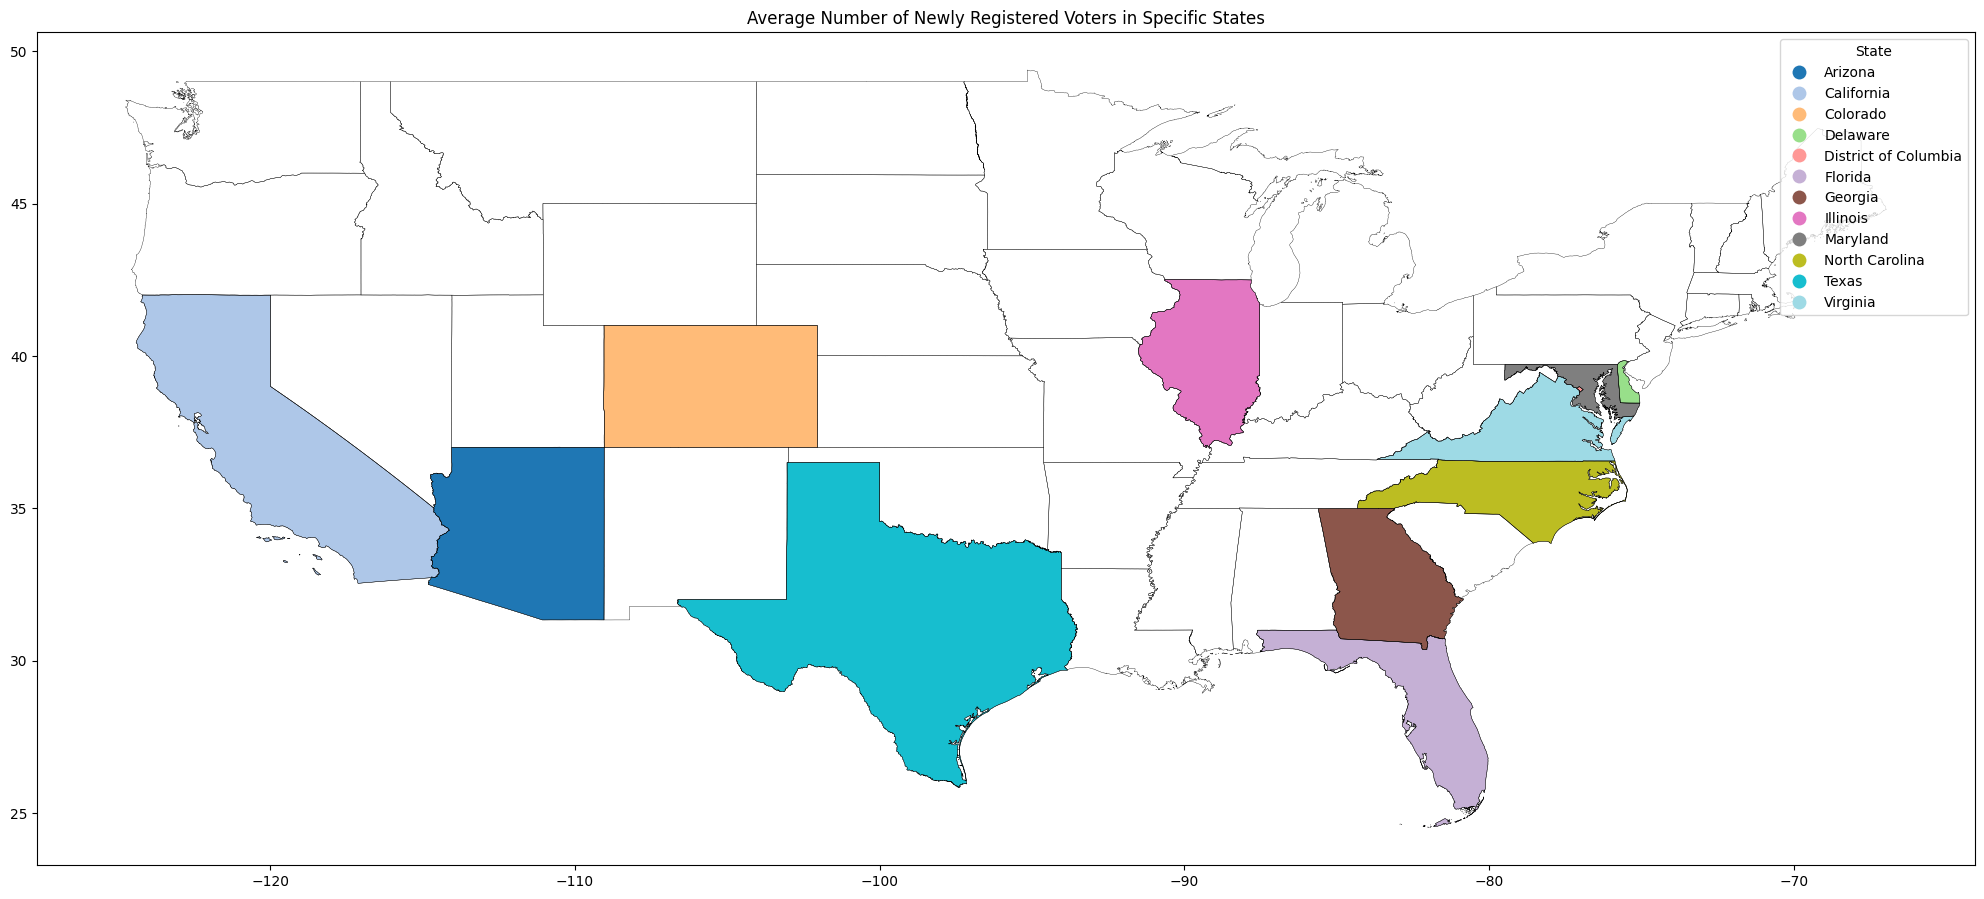

In [ ]:
us_map=bbox.boundary.plot(figsize=(25,15), edgecolor="black", linewidth = 0.25)
merged_df.plot(ax=us_map, column = "NAME", cmap="tab20", edgecolor="black", linewidth = 0.25, legend=True, legend_kwds={"title": "State"})
plt.title("Average Number of Newly Registered Voters in Specific States")

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


# Conclusion

## Insights

##### The outcome of my notebook shows that there is evidence to suggest that wildfires in California are loosely correlated with amount of newly registered voters in California. In addition, my notebook suggests that there is no evidence for a correlation between education level and amount of newly registered voters. My notebook also showcases the many ways one can organize their data so they may more easily draw conclusions and make observations. This is most apparent during data visualization and working in seaborn specifically during this notebook. Overall, my notebook shows the trends relating to my research questions and what those conclusions mean in the dataframe.

## Suggestions

##### If I were working for the government in this case, I would offer my client to think of more research questions that can be answered within the data frame or to offer more data relating to other factors. Specifically, I would absolutely add all the months of the year instead of the first four, and I would add every state so that more conclusive statements can be made. I could also offer my client suggestions about how to go about making such steps in python themselves so that they can play around with it themselves. Lastly, I could just offer my client more trends to look at by inferencing what else could affect new voter registration numbers; this can include politics and safety, for example.

## Next Steps

##### If I were continuing to work on this project, I would want to introduce new data to the dataframe or add another dataframe so that we can look at either new trends or the bigger picture of the United States. Alternatively, one could just propose new research questions and continue utilizing just the dataframe that was given. Either direction can lead to new observations and new conclusive statements being made about the dataframe provided.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

https://github.com/1mdorio1/Midterm-Project---DIDA-325/tree/main

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Michael Dorio